# Linear regressior

In [1]:
# Python imports
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(seed=1)

# Generating linear data

In [2]:
x = np.random.uniform(0, 1, 20)

def f(x):
    return x * 2

noise_variance = 0.2
noise = np.random.randn(x.shape[0]) * noise_variance

t = f(x) + noise

### Plot the values to visualize

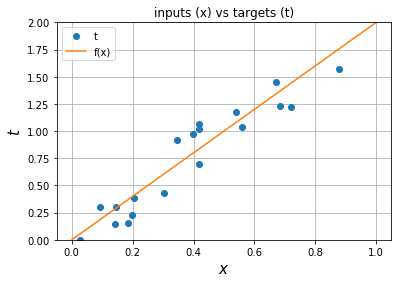

In [3]:
plt.plot(x, t, 'o', label='t')

# plot the initail line
plt.plot([0, 1], [f(0), f(1)], label='f(x)')

plt.xlabel('$x$', fontsize=15)
plt.ylabel('$t$', fontsize=15)
plt.title('inputs (x) vs targets (t)')
plt.grid()

# Setting y axis range
plt.ylim([0,2])
plt.legend(loc=2)
# Plot the initial values
plt.show()

# Defining the cost function

In [4]:
# Defining the neural network function
def nn(x, w):
    return x * w

# Defining the cost function
def cost(y, t):
    return((t - y)**2).sum()

# Plot the cost vs given weight 

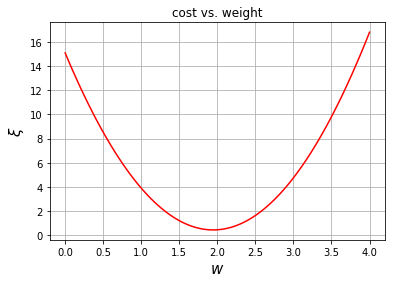

In [5]:
# define vecoto of weights
ws = np.linspace(0, 4, num=100)

# cost for each weight in ws
cost_ws = np.vectorize(lambda w: cost(nn(x, w), t))(ws)

# Now plot it
plt.plot(ws, cost_ws, 'r-')
plt.xlabel('$w$', fontsize=15)
plt.ylabel('$\\xi$', fontsize=15)
plt.title('cost vs. weight')
plt.grid()
plt.show()

In [8]:
# Accroding to theory, http://peterroelants.github.io/posts/neural_network_implementation_part01/
# The gradient of cost functino is

def gradient(w, x, t):
    return 2 * x * (nn(x, w) - t)

def delta_w(w_k, x, t, learning_rate):
    return learning_rate * gradient(w_k, x, t).sum()

# Set the initial parameter
w = 0.1
learning_rate = 0.1

# Start performing the gradient descent updates and print the weights
nb_of_iteartions = 4

# varaible for storing the cost along ths way
w_cost = [(w, cost(nn(x, w), t))] # initial cost

for i in range(nb_of_iteartions):
    dw = delta_w(w, x, t, learning_rate)   # Get th current delta
    w = w - dw
    w_cost.append((w, cost(nn(x, w), t)))
    
# Finally print the result
for i in range(len(w_cost)):
    print('w({}): {:.4f} \t cost: {:.4f}'.format(i, w_cost[i][0], w_cost[i][1]))

w(0): 0.1000 	 cost: 13.6197
w(1): 1.5277 	 cost: 1.1239
w(2): 1.8505 	 cost: 0.4853
w(3): 1.9234 	 cost: 0.4527
w(4): 1.9399 	 cost: 0.4510


### Plot the gradient discent updates

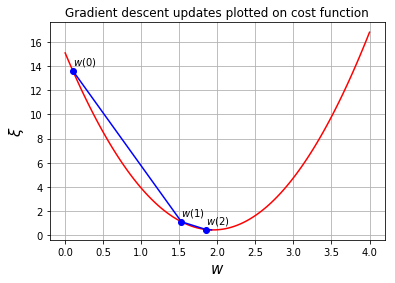

In [9]:
plt.plot(ws, cost_ws, 'r-')  # Plot the error curve
# Plot the updates
for i in range(0, len(w_cost)-2):
    w1, c1 = w_cost[i]
    w2, c2 = w_cost[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.5, '$w({})$'.format(i)) 
# Show figure
plt.xlabel('$w$', fontsize=15)
plt.ylabel('$\\xi$', fontsize=15)
plt.title('Gradient descent updates plotted on cost function')
plt.grid()
plt.show()

In [10]:
w = 0
# Start performing the gradient descent updates
nb_of_iterations = 10  # number of gradient descent updates
for i in range(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)  # get the delta w update
    w = w - dw  # update the current weight parameter

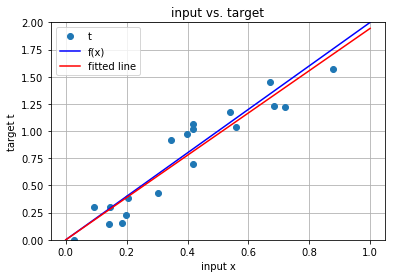

In [11]:
# Plot the fitted line agains the target line
# Plot the target t versus the input x
plt.plot(x, t, 'o', label='t')
# Plot the initial line
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
# plot the fitted line
plt.plot([0, 1], [0*w, 1*w], 'r-', label='fitted line')
plt.xlabel('input x')
plt.ylabel('target t')
plt.ylim([0,2])
plt.title('input vs. target')
plt.grid()
plt.legend(loc=2)
plt.show()